# explore gold and silver using FRED data

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
options("scipen"=999)
source("config.R")
fred<-Fred()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


first, lets check what kind of data is available on the FRED for gold and silver

In [2]:
goldFred <- fred$Meta() %>% inner_join(fred$TimeSeries(), by = 'SERIES_ID') %>%
    filter(NAME %like% '%gold%') %>%
    group_by(SERIES_ID, TICKER, NAME) %>%
    summarize(MIN_TS = min(TIME_STAMP), MAX_TS = max(TIME_STAMP)) %>%
    select(SERIES_ID, TICKER, NAME, MIN_TS, MAX_TS)

print(data.frame(goldFred))

Warning message:
“Missing values are always removed in SQL.
Use `MIN(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”Warning message:
“Missing values are always removed in SQL.
Use `MAX(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”

    SERIES_ID           TICKER
1 -2147252007 GOLDAMGBD228NLBM
2 -2147252006 GOLDAMGBD229NLBM
3 -2147252005 GOLDAMGBD230NLBM
4 -2147252004 GOLDPMGBD228NLBM
5 -2147252003 GOLDPMGBD229NLBM
6 -2147252002 GOLDPMGBD230NLBM
7 -2147170851           GVZCLS
8 -2147170841         VXGDXCLS
9 -2147170839          VXGSCLS
                                                                                          NAME
1   Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars
2 Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in British Pounds
3          Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in Euros
4    Gold Fixing Price 3:00 P.M. (London time) in London Bullion Market, based in U.S. Dollars
5  Gold Fixing Price 3:00 P.M. (London time) in London Bullion Market, based in British Pounds
6           Gold Fixing Price 3:00 P.M. (London time) in London Bullion Market, based in Euros
7                        

In [3]:
silverFred <- fred$Meta() %>% inner_join(fred$TimeSeries(), by = 'SERIES_ID') %>%
    filter(NAME %like% '%silver%') %>%
    group_by(SERIES_ID, TICKER, NAME) %>%
    summarize(MIN_TS = min(TIME_STAMP), MAX_TS = max(TIME_STAMP)) %>%
    select(SERIES_ID, TICKER, NAME, MIN_TS, MAX_TS)

print(data.frame(silverFred))

     SERIES_ID   TICKER
1  -2147170835 VXSLVCLS
2  -2146970645 SLVPRAUD
3  -2146970644 SLVPRCAD
4  -2146970643 SLVPRCHF
5  -2146970642 SLVPRCNH
6  -2146970641 SLVPRCNY
7  -2146970640 SLVPREUR
8  -2146970639 SLVPRGBP
9  -2146970638 SLVPRINR
10 -2146970637 SLVPRJPY
11 -2146970636 SLVPRMYR
12 -2146970635 SLVPRRUB
13 -2146970634 SLVPRSGD
14 -2146970633 SLVPRTHB
15 -2146970632 SLVPRTRY
16 -2146970631 SLVPRTWD
17 -2146970630 SLVPRUSD
18 -2146970629 SLVPRZAR
                                                                                                     NAME
1                                                                        CBOE Silver ETF Volatility Index
2      Silver Fixing Price 12:00 noon (London time) in London Bullion Market, based in Australian Dollars
3        Silver Fixing Price 12:00 noon (London time) in London Bullion Market, based in Canadian Dollars
4            Silver Fixing Price 12:00 noon (London time) in London Bullion Market, based in Swiss Francs
5  Silver Fixi

it looks like FRED only has data on silver from 2017. So lets focus on gold for now.

In [4]:
seriesId <- -2147252004
goldDf <- data.frame(fred$TimeSeries() %>% filter(SERIES_ID == seriesId, TIME_STAMP >= as.Date('1995-01-01')) %>% select(TIME_STAMP, VAL))
goldDf$TIME_STAMP <- as.Date(goldDf$TIME_STAMP)

print(nrow(goldDf))
print(head(goldDf))

[1] 6136
  TIME_STAMP   VAL
1 1995-01-03 380.9
2 1995-01-04 375.6
3 1995-01-05 375.3
4 1995-01-06 375.2
5 1995-01-09 372.4
6 1995-01-10 374.1


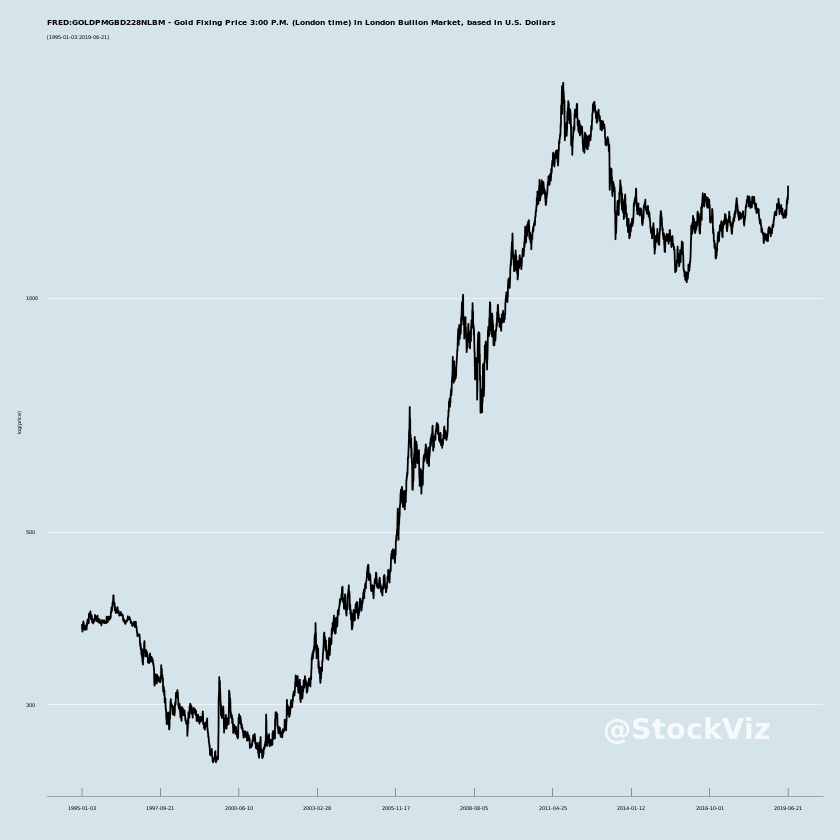

In [5]:
firstDate <- min(goldDf$TIME_STAMP)
lastDate <- max(goldDf$TIME_STAMP)
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

fredDetails <- data.frame(goldFred %>% filter(SERIES_ID == seriesId))

ggplot(goldDf, aes(x=TIME_STAMP, y=VAL)) +
    theme_economist() +
    theme(text = element_text(size = 3), element_line(size = 0.1)) +
    geom_line() +
    scale_y_log10() +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='log(price)', color='', title=sprintf("FRED:%s - %s", fredDetails$TICKER[1], fredDetails$NAME[1]), 
         subtitle=sprintf("[%s:%s]", firstDate, lastDate)) +
    annotate("text", x=lastDate, y=min(goldDf$VAL, na.rm=T), label = "@StockViz", hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)